## AI-ML (Lecture 7 - Neural Networks)

Multilayer Perceptrons (MLP)

In [84]:
!pip install keras

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\lee_m\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "C:\Users\lee_m\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\lee_m\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\lee_m\anaconda3\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "C:\Users\lee_m\anaconda3\lib\http\client.py", line 502, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\lee_m\anaconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\lee_m\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\lee_m\anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
soc

In [1]:
!pip install tensorflow

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.



We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

mizani 0.7.4 requires matplotlib>=3.5.0, but you'll have matplotlib 3.3.2 which is incompatible.
mizani 0.7.4 requires pandas>=1.3.5, but you'll have pandas 1.1.3 which is incompatible.
formulaic 0.3.4 requires pandas>=1.2, but you'll have pandas 1.1.3 which is incompatible.
formulaic 0.3.4 requires scipy>=1.6, but you'll have scipy 1.5.2 which is incompatible.


  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2


In [2]:
import tensorflow as tf

In [3]:
!pip3 show tensorflow

Name: tensorflow
Version: 2.10.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\lee_m\anaconda3\lib\site-packages
Requires: six, libclang, numpy, google-pasta, protobuf, gast, keras, wrapt, tensorflow-estimator, typing-extensions, absl-py, termcolor, tensorboard, grpcio, astunparse, tensorflow-io-gcs-filesystem, flatbuffers, h5py, keras-preprocessing, opt-einsum, setuptools, packaging
Required-by: 


In [35]:
# Load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate
from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from sklearn.neural_network import MLPClassifier

%matplotlib inline

### MLP diagram

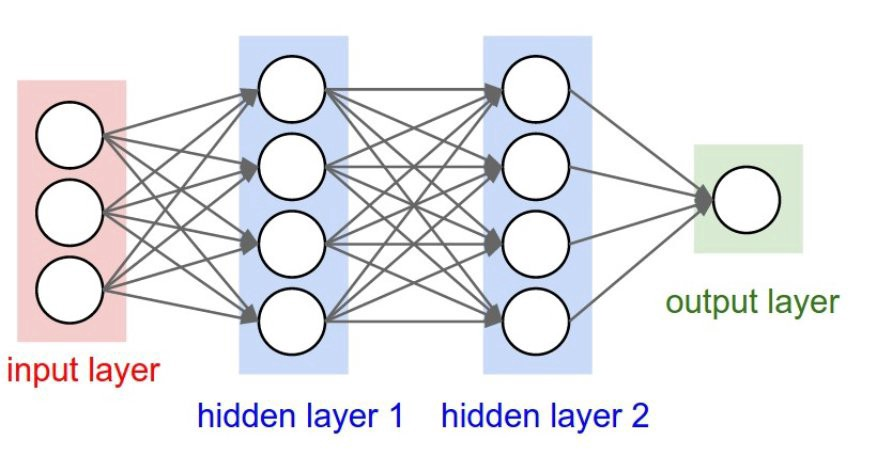

In [36]:
# Rudimentary example

X = [[0., 0.], [1., 1.]]
y = [0, 1]

# Define the classifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [37]:
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

In [38]:
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 1)]

In [39]:
clf.predict_proba([[2., 2.], [1., 2.]])

array([[1.96718015e-04, 9.99803282e-01],
       [1.96718015e-04, 9.99803282e-01]])

In [40]:
X = [[0., 0.], [1., 1.]]
y = [[0, 1], [1, 1]]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)

clf.fit(X, y)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,
              solver='lbfgs')



MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,
              solver='lbfgs')

In [41]:
print(clf.predict([[1., 2.]]))

print(clf.predict([[0., 0.]]))

[[1 1]]
[[0 1]]


# MNIST Data - MLP Classifier (Digit Recognizer)

- MNIST stands for Modified National Institute of Standards and Technology database
- Large collection of handwritten digits
- Popular image processing dataset 
- Often used for benchmarking machine learning algorithms.

- Contains a collection of 70,000, 28 x 28 images of handwritten digits from 0 to 9.

In [42]:
from keras.datasets import mnist

In [43]:
# Load the mnist data

(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [44]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


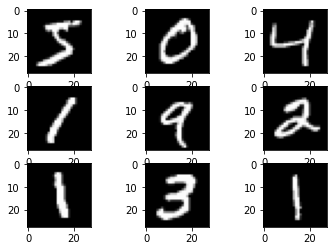

In [45]:
# plot some data

from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

## Data


In [46]:
# Load test and train data

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [47]:
# Data stored as dicitionary
# View dictionary keys as a list

train_data.keys()


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [48]:
print(train_data.shape)
print(test_data.shape) # note: test data does not include label (i.e., digit id)

(42000, 785)
(28000, 784)


In [49]:
# Check for missing values

train_data.columns[train_data.isnull().any()]

Index([], dtype='object')

In [50]:
# Check for missing values

test_data.columns[test_data.isnull().any()]

Index([], dtype='object')

<AxesSubplot:xlabel='label', ylabel='count'>

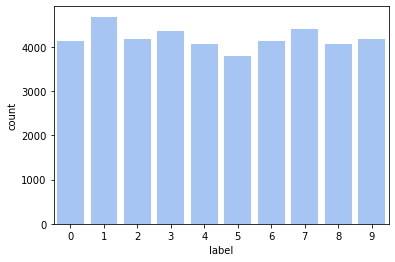

In [51]:
# Plot counts of digits in training data 

sns.countplot(x='label', data=train_data, color="#99c2ff")

In [52]:
# Split train dataset between labels and features:

labels_train = train_data.iloc[:,0]
features_train = train_data.iloc[:,1:]

In [53]:
# Inspect data

labels_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [54]:
labels_train.shape

(42000,)

In [55]:
features_train.shape

(42000, 784)

## Train Model

In [56]:
# Apply the Standard Scaler - features scaled to mean 0, variance 1

scaler = StandardScaler()

features_transf = scaler.fit_transform(features_train)

In [57]:
# Define neural netork
# One hidden layer
# Activation function = lbfgs

mlp = MLPClassifier(solver='lbfgs', activation = 'logistic', random_state=0, 
                    max_iter = 1000, alpha = 10, hidden_layer_sizes = (100,))

mlp.fit(features_transf, labels_train)

KeyboardInterrupt: 

In [ ]:
# Determine the accuracy of assignment 

mlp.score(features_transf, labels_train)

In [ ]:
# Calculated predictions on test data
# Saved results to output file

test_data_transf = scaler.transform(test_data)
pred = mlp.predict(test_data_transf)

In [ ]:
# Plot the results

unique, counts = np.unique(pred, return_counts=True)
result = dict(zip(unique, counts))

plt.bar(result.keys(), result.values())

In [ ]:
# Write out the results

output = {}

output['Label'] = pred

In [ ]:
output = pd.DataFrame(output)
output.index+=1

In [ ]:
output.head()